In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels import robust
import scipy.stats as stats
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Measure of Central tendency 

## Mean

In [5]:
print('The Average Age:', data.Age.mean())
print(f'The Average Annual Income:{data["Annual Income (k$)"].mean()}k')

The Average Age: 38.85
The Average Annual Income:60.56k


## Ages

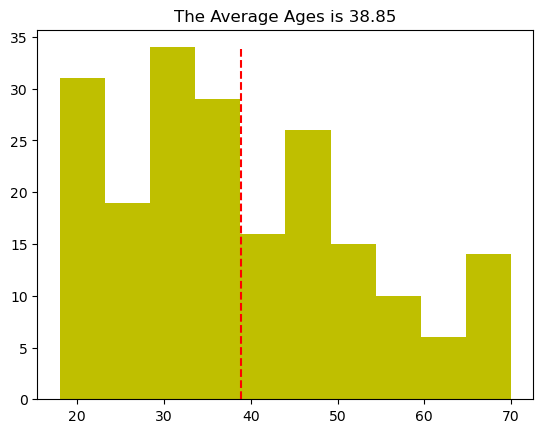

In [6]:

counts, bins = np.histogram(data.Age)
plt.hist(bins[:-1], bins, weights=counts,color='y')
mean = sum(data.Age) / len(data.Age)
median = np.median(data.Age)
plt.plot([mean,mean],[0,max(counts)],'r--')
plt.title('The Average Ages is 38.85')
plt.show()

## Income

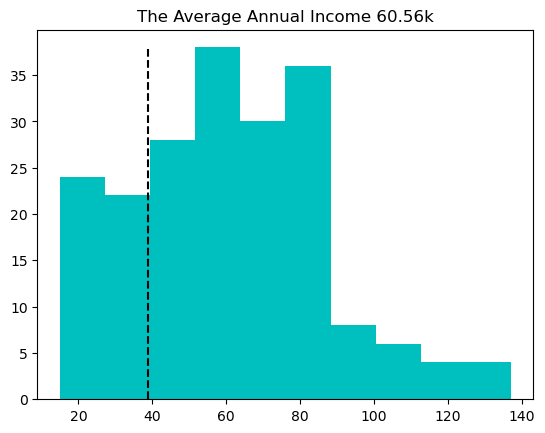

In [27]:
counts, bins = np.histogram(data["Annual Income (k$)"])
plt.hist(bins[:-1], bins, weights=counts,color='c')
mean = sum(data.Age) / len(data.Age)
plt.plot([mean,mean],[0,max(counts)],'k--')
plt.title('The Average Annual Income 60.56k')
plt.show()

* the mean used to describe the center or average value of a set of data points.
* The mean can be sensitive to outliers, as a single extremely high or low value can significantly affect its value.

## Median

### Ages

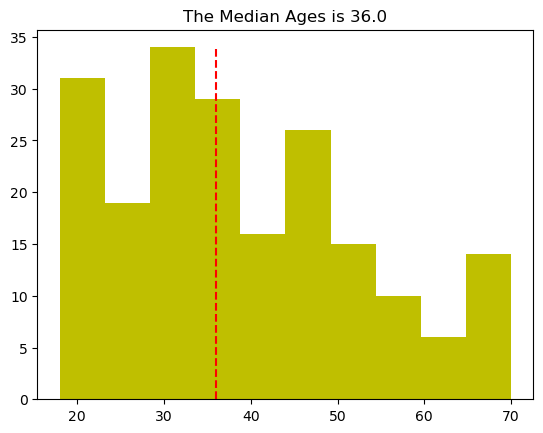

In [29]:
counts, bins = np.histogram(data.Age)
plt.hist(bins[:-1], bins, weights=counts,color='y')

median = np.median(data.Age)
plt.plot([median,median],[0,max(counts)],'r--')
plt.title(f'The Median Ages is {median}')
plt.show()

### Income

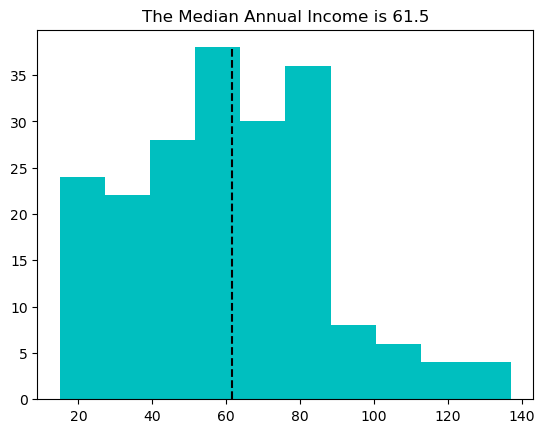

In [32]:
counts, bins = np.histogram(data["Annual Income (k$)"])
plt.hist(bins[:-1], bins, weights=counts,color='c')
median = np.median(data["Annual Income (k$)"])
plt.plot([median,median],[0,max(counts)],'k--')
plt.title(f'The Median Annual Income is {median}')
plt.show()

* The median is the middle value of a dataset. 
* 50% of the observations are below the median value and other 50% are above the median value
* The median is less affected by outliers than the mean.

## Mode

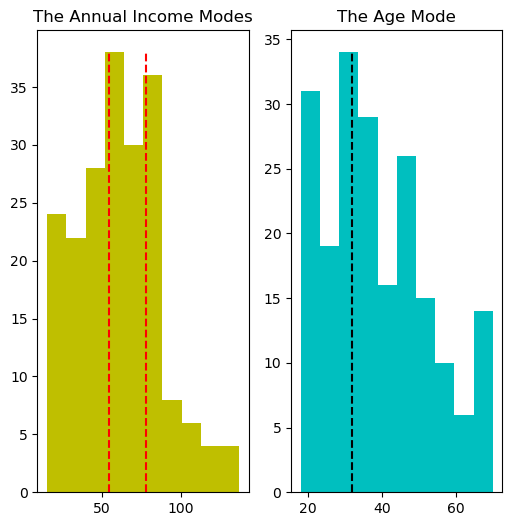

In [11]:
counts_income, bins_income = np.histogram(data["Annual Income (k$)"])
income_mode = data["Annual Income (k$)"].mode()
fig,ax = plt.subplots(1,2,figsize=(6,6))
ax[0].hist(data["Annual Income (k$)"],color='y')
ax[0].plot([income_mode,income_mode],[0,max(counts_income)],'r--')
ax[0].set_title('The Annual Income Modes')


counts_age, bins_age = np.histogram(data.Age)
age_mode = data.Age.mode()
ax[1].hist(data.Age,color='c')
ax[1].plot([age_mode,age_mode],[0,max(counts_age)],'k--')
ax[1].set_title('The Age Mode')
plt.show()

In [24]:
print('The Income mode is',np.array(income_mode))
print('The Age mode is',np.array(age_mode))

The Income mode is [54 78]
The Age mode is [32]


* The mode is the value that appears most frequently in a dataset
* The mode is not influenced by outliers
* Income has 2 Modes

# Variance

### compaire bettwen females and males variance 

In [12]:
fdata=data[data.Gender == 'Female']
mdata=data[data.Gender == 'Male']

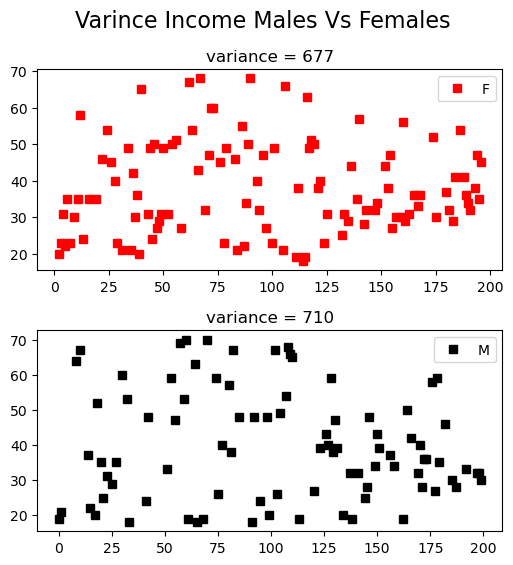

In [13]:
f_variance = np.var(fdata["Annual Income (k$)"],ddof=1)
m_variance =np.var(mdata["Annual Income (k$)"],ddof=1)

fig,ax = plt.subplots(2,1,figsize=(6,6))
fig.suptitle('Varince Income Males Vs Females',fontsize=16)
ax[0].plot(fdata.Age,'s',color='r')
ax[0].set_title(f'variance = {round(f_variance)}')
ax[0].legend('Female')
ax[1].plot(mdata.Age,'s',color='k')
ax[1].set_title(f'variance = {round(m_variance)}')
ax[1].legend('Male')

plt.subplots_adjust(hspace=0.3)
plt.show()

* **A high variance indicates that the data points are spread out widely from the mean, while a low variance indicates that the data points are clustered closely around the mean**

# Normalize the data and Removing outliers 

## Z-score
**is a statistical technique used to transform a dataset into a standard normal distribution with a mean of 0 and a standard deviation of 1. This process is commonly employed in data analysis and machine learning to make data more suitable for various algorithms and comparisons.**

## The modified Z-score
**is a variation of the traditional Z-score used in statistics and data analysis. It is primarily employed to identify outliers in a dataset. While the standard Z-score is based on the mean and standard deviation of the dataset, the modified Z-score takes into account the median and median absolute deviation (MAD), making it more robust against extreme values or outliers**

## Modifide Z-score method Age data 

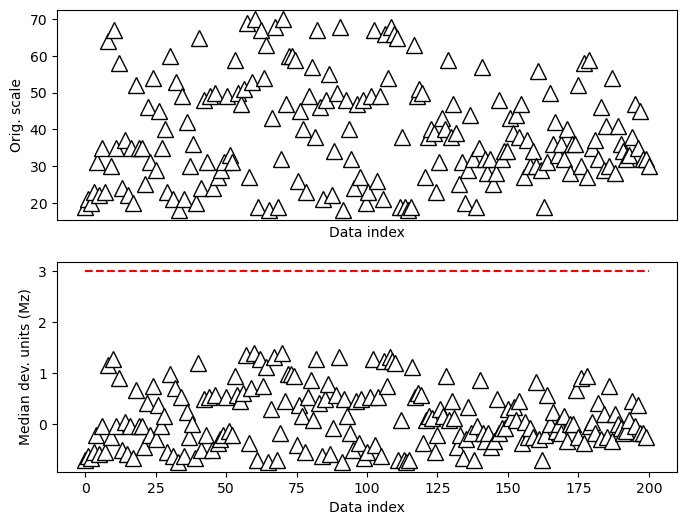

In [14]:
dataMed = np.median(data.Age)
dataMAD = robust.mad(data.Age)


dataMz = stats.norm.ppf(.75)*(data.Age-dataMed) / dataMAD

zscorethresh = 3

# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data.Age,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,len(data.Age)],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()

* **There is no outliers detected**

#  Z-score method Income data

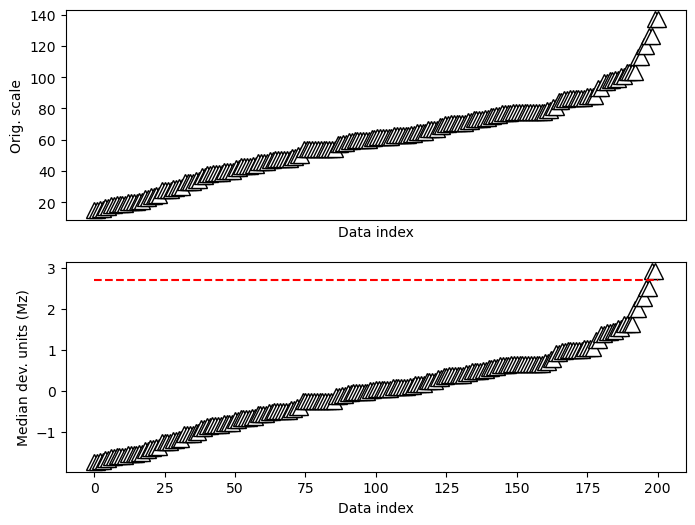

In [15]:
dataMed = np.median(data["Annual Income (k$)"])
dataMAD = robust.mad(data["Annual Income (k$)"])

dataZ = (data["Annual Income (k$)"]-np.mean(data["Annual Income (k$)"])) / np.std(data["Annual Income (k$)"])



zscorethresh = 2.7

# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data["Annual Income (k$)"],'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,len(data["Annual Income (k$)"])],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()

In [16]:
d=data["Annual Income (k$)"]

# Detecting outliers 

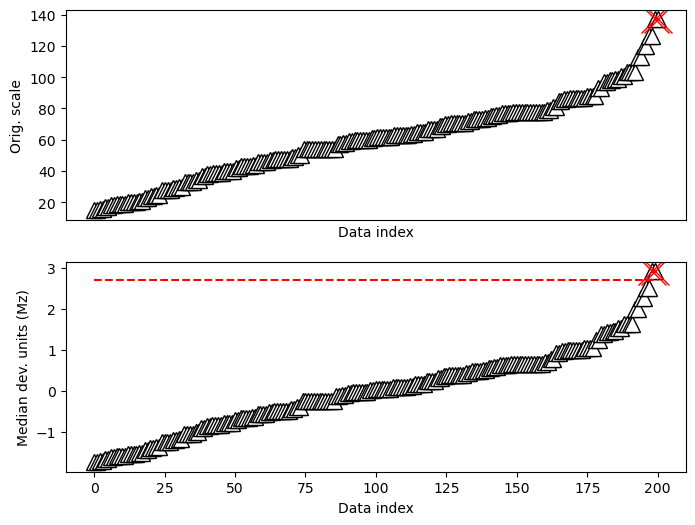

In [17]:
outliers = np.where(abs(dataZ)>zscorethresh)[0] # the outliers above the destripution and the outliers bellow the destribution

# and cross those out
ax[0].plot(outliers,d[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig

so here we found some outliers beacuse the thershhold is 2.7

# Multivariate outlier detection

**is a statistical technique used to identify unusual or atypical data points in a dataset that consists of multiple variables or features. Unlike univariate outlier detection, which examines data in one dimension at a time, multivariate outlier detection considers the relationships and interactions between variables.**

Text(0, 0.5, 'Z distance')

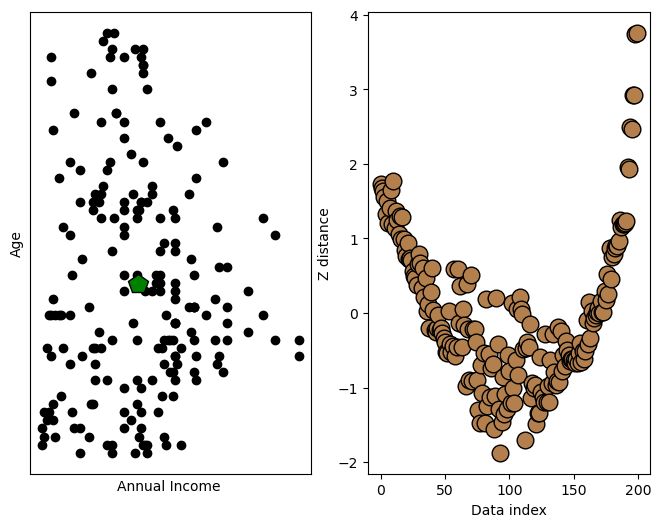

In [25]:
N = len(data)

datamean = [ np.mean(data["Annual Income (k$)"]), np.mean(data.Age) ]


# compute distance of each point to the mean
ds = np.zeros(N)
for i in range(N):
    ds[i] = np.sqrt( (data["Annual Income (k$)"][i]-datamean[0])**2 + (data.Age[i]-datamean[1])**2 )
    

# convert to z (don't need the original data)
ds = (ds-np.mean(ds)) / np.std(ds)





# plot the data
fig,ax = plt.subplots(1,2,figsize=(8,6))

ax[0].plot(data["Annual Income (k$)"],data.Age,'ko',markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Annual Income ')
ax[0].set_ylabel('Age')

# plot the multivariate mean
ax[0].plot(datamean[0],datamean[1],'kp',markerfacecolor='g',markersize=15)

# then plot those distances
ax[1].plot(ds,'ko',markerfacecolor=[.7, .5, .3],markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

[196 197 198 199]


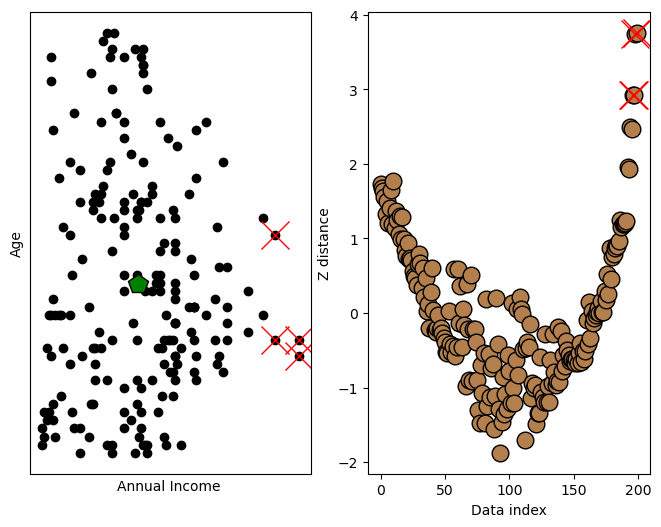

In [26]:
distanceThresh = 2.7

# find the offending points
oidx = np.where(ds>distanceThresh)[0]

print(oidx)


# and cross those out
ax[1].plot(oidx,ds[oidx],'x',color='r',markersize=20)
ax[0].plot(data["Annual Income (k$)"][oidx],data.Age[oidx],'x',color='r',markersize=20)

fig

* so hear there are some outliers Detected, multivariant Income and Age

# **Conclusion**

In conclusion, our analysis of demographic data shows that our population has an average age of 38.85 years and an average annual income of 60.56k. We found that the most common income levels are 54k and 78k, while the most common age is 32 years.
The median annual income is 61.5k, and the median age is 36 years. Additionally, there is a slightly higher income variance among males (710) compared to females (677), indicating some income disparities between genders in our population.